In [142]:
# libraries
import pandas as pd
import numpy as np
import requests
import json
from pandas.io.json import json_normalize

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn import metrics
from math import *
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import pickle

In [104]:
data = pd.read_csv('solar_generation_data.csv', sep = ',')#, parse_dates=['date'])

In [105]:
data.shape

(365, 8)

In [106]:
data.head()

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,Jan,1,109°,85°,30.0,9,0.0,9.93
1,Jan,2,106°,71°,30.1,9,0.0,9.97
2,Jan,3,106°,81°,29.5,9,0.0,9.77
3,Jan,4,102°,83°,13.0,4,0.0,4.30
4,Jan,5,105°,80°,30.1,9,0.0,9.97


In [107]:
data.isna().sum()

Month                      0
Day                        0
Temp Hi                    0
Temp Low                   0
Solar                      0
Cloud Cover Percentage     0
Rainfall in mm            53
Power Generated in MW      0
dtype: int64

In [108]:
data = data.fillna(0)

In [109]:
data.isna().sum()

Month                     0
Day                       0
Temp Hi                   0
Temp Low                  0
Solar                     0
Cloud Cover Percentage    0
Rainfall in mm            0
Power Generated in MW     0
dtype: int64

In [110]:
data.dtypes

Month                      object
Day                         int64
Temp Hi                    object
Temp Low                   object
Solar                     float64
Cloud Cover Percentage      int64
Rainfall in mm            float64
Power Generated in MW     float64
dtype: object

In [111]:
data.columns

Index(['Month ', 'Day', 'Temp Hi', 'Temp Low', 'Solar',
       'Cloud Cover Percentage', 'Rainfall in mm', 'Power Generated in MW'],
      dtype='object')

In [112]:
data.rename(columns={'Month ':'Month'}, inplace=True)

In [113]:
data.Month

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
360    Dec
361    Dec
362    Dec
363    Dec
364    Dec
Name: Month, Length: 365, dtype: object

In [114]:
data['Month'] = pd.to_datetime(data.Month, format='%b').dt.month

In [115]:
data.tail(10)

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
355,12,22,108°,85°,30.1,9,0.0,9.97
356,12,23,108°,83°,30.0,9,0.0,9.93
357,12,24,109°,85°,29.8,9,0.0,9.87
358,12,25,109°,69°,27.5,9,0.0,9.11
359,12,26,111°,81°,29.9,9,0.0,9.90
360,12,27,101°,83°,26.4,8,0.0,8.74
361,12,28,102°,84°,25.8,8,0.0,8.54
362,12,29,104°,83°,26.9,8,0.0,8.91
363,12,30,105°,80°,25.1,8,0.0,8.31
364,12,31,108°,81°,29.0,9,0.0,9.60


In [116]:
data["Temp Low"] = data["Temp Low"].replace('\u00b0','', regex=True)
data["Temp Hi"] = data["Temp Hi"].replace('\u00b0','', regex=True)

In [117]:
data.tail(10)

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
355,12,22,108,85,30.1,9,0.0,9.97
356,12,23,108,83,30.0,9,0.0,9.93
357,12,24,109,85,29.8,9,0.0,9.87
358,12,25,109,69,27.5,9,0.0,9.11
359,12,26,111,81,29.9,9,0.0,9.90
360,12,27,101,83,26.4,8,0.0,8.74
361,12,28,102,84,25.8,8,0.0,8.54
362,12,29,104,83,26.9,8,0.0,8.91
363,12,30,105,80,25.1,8,0.0,8.31
364,12,31,108,81,29.0,9,0.0,9.60


In [118]:
data["Temp Hi"] = pd.to_numeric(data["Temp Hi"], errors='coerce')
data["Temp Low"] = pd.to_numeric(data["Temp Low"], errors='coerce')


In [119]:
data.dtypes

Month                       int64
Day                         int64
Temp Hi                     int64
Temp Low                    int64
Solar                     float64
Cloud Cover Percentage      int64
Rainfall in mm            float64
Power Generated in MW     float64
dtype: object

In [120]:
data.head(10)

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,1,1,109,85,30.0,9,0.0,9.93
1,1,2,106,71,30.1,9,0.0,9.97
2,1,3,106,81,29.5,9,0.0,9.77
3,1,4,102,83,13.0,4,0.0,4.30
4,1,5,105,80,30.1,9,0.0,9.97
5,1,6,107,84,26.3,8,0.0,8.71
6,1,7,104,82,30.2,9,0.0,10.00
7,1,8,100,69,29.8,9,0.0,9.87
8,1,9,103,81,30.1,9,0.0,9.97
9,1,10,104,82,27.1,9,0.0,8.97


In [121]:
#data['Temp_Avg_Far'] = data[['Temp Hi', 'Temp Low']].mean(axis=1)

In [122]:
#data.head(10)

In [123]:
#Convert Fahrenheit to Celsius
#def far_cel(temp_far):
#    temp_cel = (temp_far - 32) * 5 / 9
#    return temp_cel

In [124]:
#data['Temp_Avg_Cel']=far_cel(data["Temp_Avg_Far"])

In [125]:
#data.head(10)

In [126]:
data = data.drop(columns =['Solar' ]) 

In [127]:
data.tail(10)

,Month,Day,Temp Hi,Temp Low,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
355,12,22,108,85,9,0.0,9.97
356,12,23,108,83,9,0.0,9.93
357,12,24,109,85,9,0.0,9.87
358,12,25,109,69,9,0.0,9.11
359,12,26,111,81,9,0.0,9.90
360,12,27,101,83,8,0.0,8.74
361,12,28,102,84,8,0.0,8.54
362,12,29,104,83,8,0.0,8.91
363,12,30,105,80,8,0.0,8.31
364,12,31,108,81,9,0.0,9.60


In [128]:
corr = data.corr()

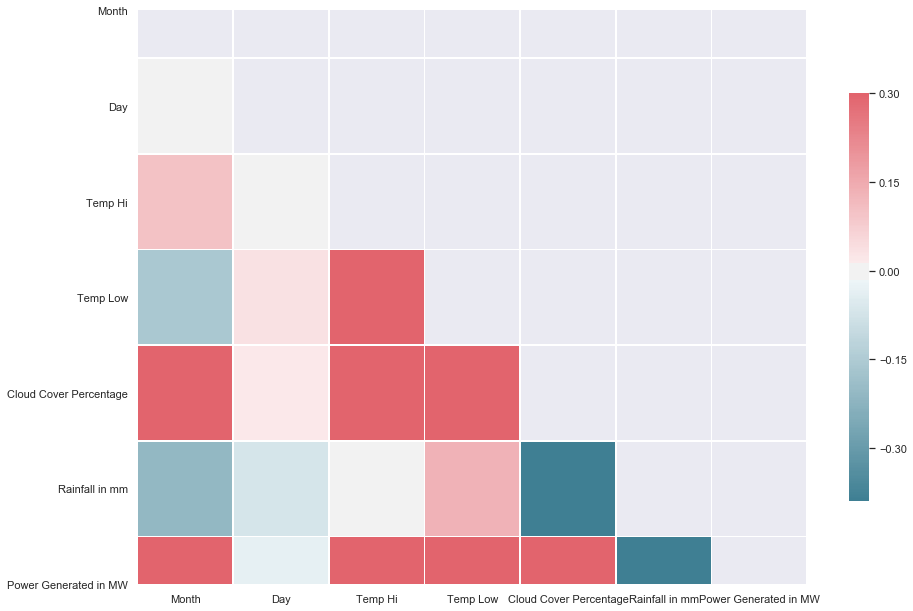

In [129]:
sns.set()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [130]:
data.describe()

,Month,Day,Temp Hi,Temp Low,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,6.526027,15.720548,91.687671,66.635616,6.972603,2.339726,7.488192
std,3.452584,8.808321,10.281531,10.750484,1.699811,15.256405,1.759069
min,1.000000,1.000000,66.000000,43.000000,1.000000,0.000000,0.500000
25%,4.000000,8.000000,83.000000,58.000000,6.000000,0.000000,6.130000
50%,7.000000,16.000000,93.000000,68.000000,7.000000,0.000000,7.550000
75%,10.000000,23.000000,99.000000,75.000000,9.000000,0.000000,8.940000
max,12.000000,31.000000,111.000000,94.000000,9.000000,161.500000,10.000000


In [233]:
y= data['Power Generated in MW'].values
Xdata = data.drop(['Power Generated in MW', 'Rainfall in mm'], axis = 1)
X = Xdata.values
#X = StandardScaler().fit_transform(X)
model = RandomForestRegressor(n_jobs=-1)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

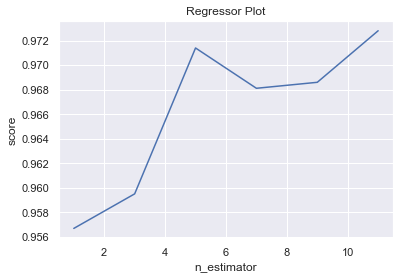

In [242]:
estimators = np.arange(1, 12, 2)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Regressor Plot")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [243]:
labels = Xdata.columns
result = pd.DataFrame()
result['feature'] = labels
result['importance'] = model.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
4,Cloud Cover Percentage,0.973983
1,Day,0.008893
0,Month,0.007705
2,Temp Hi,0.005576
3,Temp Low,0.003843


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data', len(X_train), len(y_train))
print('Test data', len(X_test), len(y_test))

Training data 255 255
Test data 110 110


In [245]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [246]:
Y_predicted = dt.predict(X_test)
dt.score(X_test, y_test)

0.961348793421715

In [64]:
#r2_score(y_test, Y_predicted)

In [255]:
filename = 'Solar_model.sav'
pickle.dump(dt, open(filename, 'wb'))

In [247]:
pickle.dump(dt, open('solar_model.pkl','wb'))


API Code

In [248]:
# Solar
longitude = 142.110216
latitude = -19.461907

url = ('https://api.openweathermap.org/data/2.5/onecall?lat=-19.461907&lon=142.110216&units=imperial&appid=43e49f2fb4d17b806dfff389f21f4d27')
response = requests.get(url)

print(response.status_code)

200


In [249]:
weather = response.json()
dailynorm = json_normalize(weather, 'daily')
#dailynorm.head(10)
df = pd.DataFrame(dailynorm)

In [250]:
solar_df = df[['dt', 'temp.min', 'temp.max', 'clouds']].copy()
solar_df.head(10)

,dt,temp.min,temp.max,clouds
0,1601776800,65.68,94.08,79
1,1601863200,68.45,95.94,71
2,1601949600,70.27,95.74,0
3,1602036000,69.91,95.59,0
4,1602122400,71.49,96.03,0
5,1602208800,74.61,98.46,82
6,1602295200,71.26,99.70,1
7,1602381600,71.44,98.10,0


In [251]:
solar_df['date'] = pd.to_datetime(solar_df['dt'],unit='s')
solar_df['day'] = solar_df['date'].dt.day
solar_df['month'] = solar_df['date'].dt.month
solar_df.head(10)

,dt,temp.min,temp.max,clouds,date,day,month
0,1601776800,65.68,94.08,79,2020-10-04 02:00:00,4,10
1,1601863200,68.45,95.94,71,2020-10-05 02:00:00,5,10
2,1601949600,70.27,95.74,0,2020-10-06 02:00:00,6,10
3,1602036000,69.91,95.59,0,2020-10-07 02:00:00,7,10
4,1602122400,71.49,96.03,0,2020-10-08 02:00:00,8,10
5,1602208800,74.61,98.46,82,2020-10-09 02:00:00,9,10
6,1602295200,71.26,99.70,1,2020-10-10 02:00:00,10,10
7,1602381600,71.44,98.10,0,2020-10-11 02:00:00,11,10


In [252]:
solar_df.rename(columns={'temp.min':'Temp Low',
                          'temp.max':'Temp Hi',
                          'clouds':'Cloud Cover Percentage'}, 
                 inplace=True)
solar_df = solar_df.drop(['dt','date'], axis = 1)


In [253]:
solar_df = solar_df.fillna(0)

In [268]:
loaded_model = pickle.load(open(filename, 'rb'))

In [257]:
Xnew = solar_df.values

In [258]:
p_pred = loaded_model.predict(Xnew)

In [259]:
p_pred

array([9.725, 9.725, 9.725, 9.725, 9.725, 9.725, 9.725, 9.725])

In [260]:
p_pred = pd.DataFrame(p_pred)

In [261]:
p_pred.head()

,0
0,9.725
1,9.725
2,9.725
3,9.725
4,9.725


In [262]:
p_pred.dtypes

0    float64
dtype: object

In [207]:
#p_pred.rename(columns={'0':'Predicted Power'}, inplace=True)

In [263]:
p_pred.columns = ['Predicted Power']

In [264]:
p_pred.head()

,Predicted Power
0,9.725
1,9.725
2,9.725
3,9.725
4,9.725


In [265]:
final_solar_df = pd.concat([solar_df, p_pred], axis = 1)

In [266]:
print(final_solar_df)

   Temp Low  Temp Hi  Cloud Cover Percentage  day  month  Predicted Power
0     65.68    94.08                      79    4     10            9.725
1     68.45    95.94                      71    5     10            9.725
2     70.27    95.74                       0    6     10            9.725
3     69.91    95.59                       0    7     10            9.725
4     71.49    96.03                       0    8     10            9.725
5     74.61    98.46                      82    9     10            9.725
6     71.26    99.70                       1   10     10            9.725
7     71.44    98.10                       0   11     10            9.725


In [148]:
model = pickle.load(open('model.pkl','rb'))

In [157]:
solar_df = solar_df.fillna(0)

In [158]:
Xnew = solar_df.values

In [159]:
solar_df.head(10)

,Temp Low,Temp Hi,Cloud Cover Percentage,Rainfall in mm,day,month
0,48.72,72.45,17,0.00,3,10
1,57.43,73.60,92,0.58,4,10
2,48.54,71.58,0,0.00,5,10
3,52.34,77.20,0,0.00,6,10
4,56.80,81.95,0,0.00,7,10
5,63.14,80.60,86,0.00,8,10
6,60.96,70.86,100,0.00,9,10
7,63.79,79.65,80,0.44,10,10


In [184]:
prediction = model.predict(Xnew)

In [187]:
prediction = pd.DataFrame(prediction)

In [188]:
prediction.head(10)

,0
0,4.020000
1,4.020000
2,5.605000
3,6.374667
4,7.479302
5,8.547895
6,9.725000
7,9.725000


In [211]:
#solar_df('prediction') = model.predict(Xnew)

In [212]:
#solar_df('prediction') = pd.DataFrame(prediction)

In [189]:
prediction.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [178]:
prediction = prediction.rename(columns={'0':'Predicted Power'}, inplace=True)

In [180]:
prediction

In [151]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
pred = loaded_model.predict